In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("US_Accidents_March23.csv", usecols=["Start_Lat", "Start_Lng","City","State"]
                )
df.shape

(7728394, 4)

### We will be using Start_Lat and Start_Lng

This is because we the column End_Lat and End_lng is filled with Null.


In [2]:
#removing missing coardinates

where_df =df.dropna(subset=["Start_Lat", "Start_Lng"]).copy()
where_df.shape

(7728394, 4)

In [3]:
#validating coordinates for US bounds

print("Latitude range:", where_df["Start_Lat"].min(),"to", where_df["Start_Lat"].max())
print("Longitude range:", where_df["Start_Lng"].min(),"to", where_df["Start_Lng"].max())


Latitude range: 24.5548 to 49.002201
Longitude range: -124.623833 to -67.113167



## We will be using a sample Data Frame with just 50000 rows.
 we use plotly.express to show our geographical analysis.

 

In [4]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import plotly.express as px

state_counts = df.groupby("State").size().reset_index(name="Accident_Count")
sample_df = df.sample(50000, random_state=42)
state_counts.head()


,State,Accident_Count
0,AL,101044
1,AR,22780
2,AZ,170609
3,CA,1741433
4,CO,90885


### Analysis
Bellow we can see that the state of Califoria has highes accident count (1.7 million) accourding to our Sample Data, then Florida with 0.9 million accidemnts and third is Texas with 0.6 million accidents. 


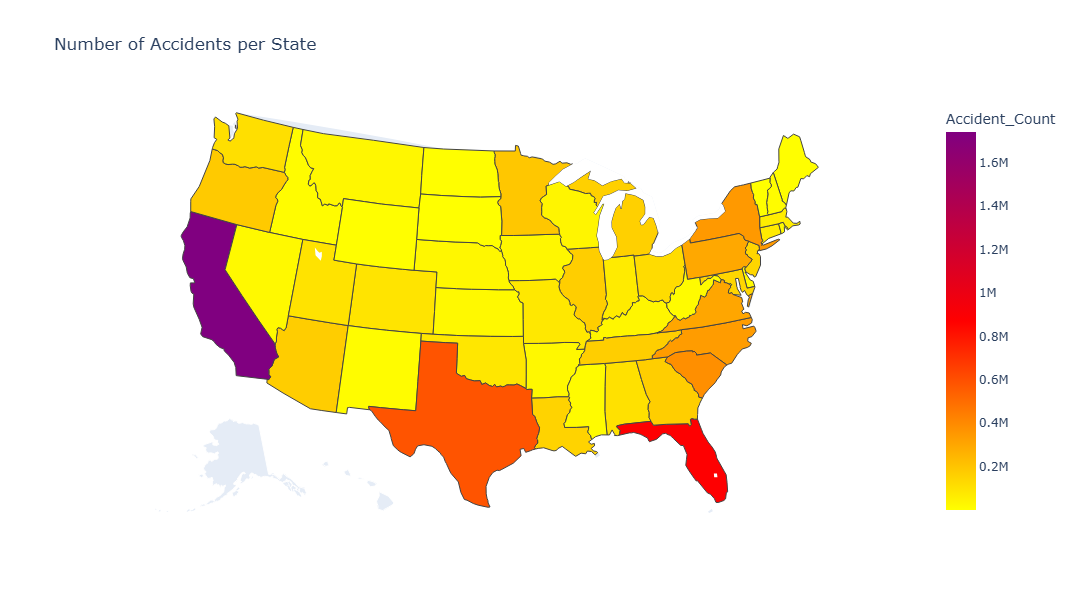

In [15]:
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Accident_Count",
    scope="usa",
    color_continuous_scale=["yellow", "red","purple"],
    title="Number of Accidents per State"
)

fig.update_layout(height=600)

fig.show()


### Scatter Map
Our scatter map shows that most accidents occur on the East side and west side of the country while the middle is not as dense.

C:\Users\New User\AppData\Local\Temp\ipykernel_23772\3103065793.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



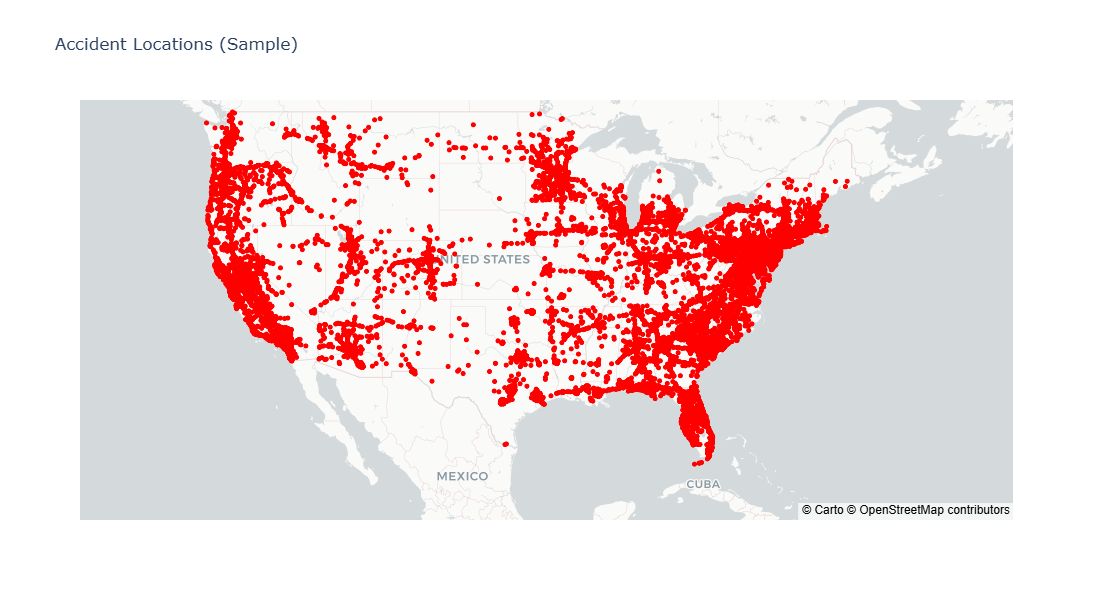

In [7]:
fig = px.scatter_mapbox(
    sample_df,
    lat="Start_Lat",
    lon="Start_Lng",
    zoom=3,
    mapbox_style="carto-positron",
    color_discrete_sequence=["red"],
    hover_data=["Start_Lat", "Start_Lng"],
    title="Accident Locations (Sample)"
)

fig.update_layout(height=600)
fig.show()


### Hotspots
Bellow is top 10 and least 10 accident counts accross all Lat/Lng pair. the table shows real hotspots the top one is 25.9, -80.2 Miami, LA and NYC.

In [14]:
#rounding the values to 1 decimal place

df["Lat_Rounded"] = df["Start_Lat"].round(1)
df["Lng_Rounded"] = df["Start_Lng"].round(1)

#we count accidents per Lat/Lng

lat_lng_counts = (
    df.groupby(["Lat_Rounded", "Lng_Rounded"])
      .size()
      .reset_index(name="Accident_Count")
)

### Spatial Analysis Findings From Tables Below

The highest accident density occurs around latitude 25.9 and longitude -80.2, corresponding to the Miami metropolitan area. Other high-density regions include Los Angeles and New York City.

This suggests that accident frequency correlates strongly with high urban density and major metropolitan traffic hubs.


In [13]:
 #top 10 highest density locations

top_locations = lat_lng_counts.sort_values(
    "Accident_Count",
    ascending=False
).head(10)

top_locations

,Lat_Rounded,Lng_Rounded,Accident_Count
62,25.9,-80.2,53223
6729,34.0,-118.2,39836
38,25.7,-80.4,33737
9347,35.2,-80.8,33304
10700,35.8,-78.6,33268
4686,32.8,-96.8,32693
21157,40.8,-73.9,31736
6524,33.9,-118.3,31719
6728,34.0,-118.3,31396
48,25.8,-80.3,28296


In [10]:
#lowest locations but not 0

lowest_locations = lat_lng_counts[
    lat_lng_counts["Accident_Count"] > 0
].sort_values("Accident_Count").head(10)

lowest_locations


,Lat_Rounded,Lng_Rounded,Accident_Count
18942,40.0,-120.8,1
3566,32.1,-91.5,1
3565,32.1,-93.5,1
29281,44.9,-88.2,1
18089,39.6,-94.9,1
3562,32.1,-94.3,1
3560,32.1,-94.5,1
8520,34.9,-117.7,1
3559,32.1,-94.7,1
32147,47.2,-98.6,1


### Latitude distribution
The following distribiution tells us which latitude zones are most dangerous. 

34–35 → Southern California

40–41 → NYC / Northeast

29–30 → Texas / Gulf

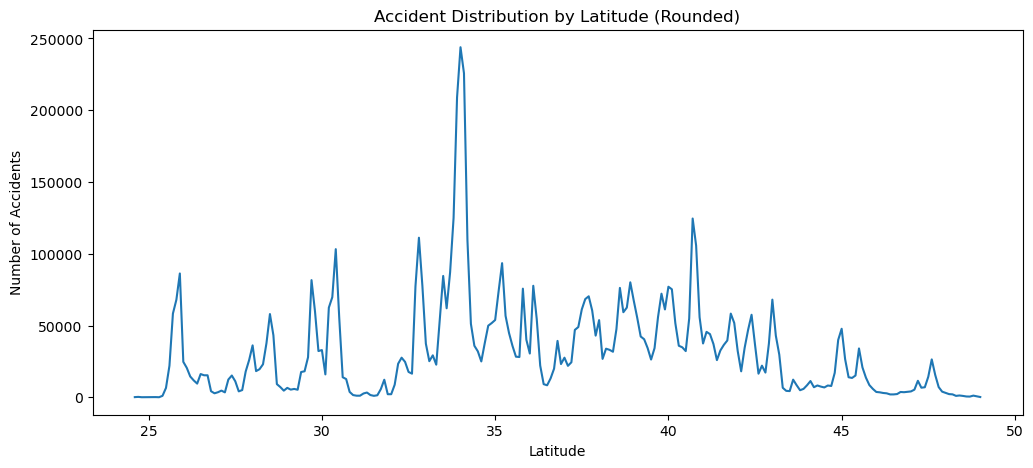

In [17]:
df["Lat_Rounded"] = df["Start_Lat"].round(1)

lat_counts = df.groupby("Lat_Rounded").size().reset_index(name="Count")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(lat_counts["Lat_Rounded"], lat_counts["Count"])
plt.title("Accident Distribution by Latitude (Rounded)")
plt.xlabel("Latitude")
plt.ylabel("Number of Accidents")
plt.show()


In [20]:
#finding highest latitude bands

lat_counts.sort_values("Count", ascending=False).head(10)


,Lat_Rounded,Count
94,34.0,243908
95,34.1,225779
93,33.9,208879
92,33.8,124988
161,40.7,124589
82,32.8,111221
96,34.2,109532
162,40.8,105737
58,30.4,103249
106,35.2,93494


### Longitude distribution
The following distribiution tells us which longitude zones are most dangerous. 

Highest density around -80.2 → Miami area

Strong cluster around -118.2 / -118.3

This shows that accident density is heavily concentrated in major coastal metropolitan regions.

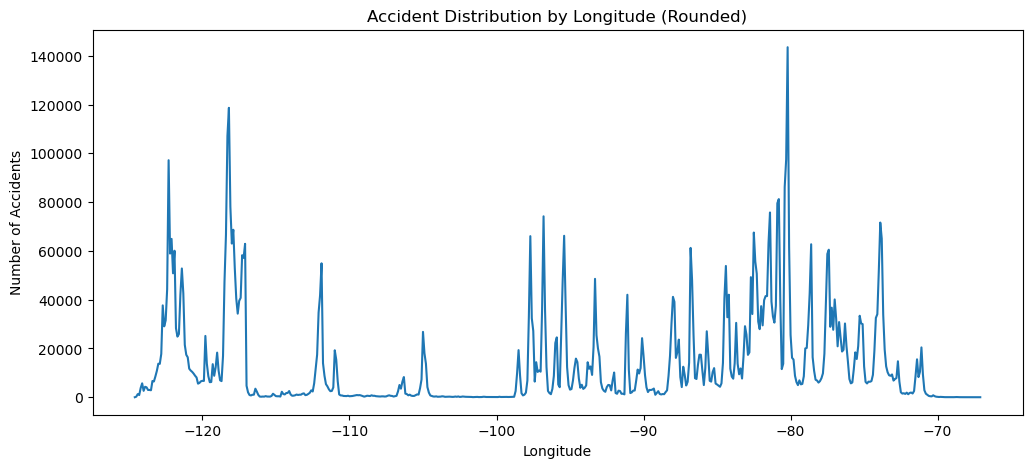

In [24]:
df["Lng_Rounded"] = df["Start_Lng"].round(1)

lng_counts = df.groupby("Lng_Rounded").size().reset_index(name="Count")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(lng_counts["Lng_Rounded"], lng_counts["Count"])
plt.title("Accident Distribution by Longitude (Rounded)")
plt.xlabel("Longitude")
plt.ylabel("Number of Accidents")
plt.show()


In [25]:
#finding highest longitude bands

lng_counts.sort_values("Count", ascending=False).head(10)

,Lng_Rounded,Count
444,-80.2,143481
64,-118.2,118635
63,-118.3,107095
443,-80.3,97512
23,-122.3,97160
442,-80.4,86148
438,-80.8,81235
437,-80.9,79515
65,-118.1,78098
432,-81.4,75733
